# Clone WaveRNN repo

In [1]:
# Clone the repo
!git clone https://github.com/as-ideas/ForwardTacotron
# Checkout to latest version as of the time this notebook was created
!cd ForwardTacotron && git reset --hard "f537c5f16f9459948b64f563749d65dcedacbe04"

Cloning into 'ForwardTacotron'...
remote: Enumerating objects: 5473, done.
remote: Counting objects: 100% (1844/1844), done.
remote: Compressing objects: 100% (744/744), done.
remote: Total 5473 (delta 1342), reused 1512 (delta 1095), pack-reused 3629
Receiving objects: 100% (5473/5473), 205.55 MiB | 22.36 MiB/s, done.
Resolving deltas: 100% (3752/3752), done.
HEAD is now at f537c5f Update README.md


# Download data

In [10]:
Size = "Smaller" #@param ["Full", "Small", "Smaller"]
if Size == "Full":
  vctk_dataset_path = "VCTK-Corpus/"
  archive_path="VCTK-Corpus.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EcnCAgHdAwBJmWk9vNcpiKgB5Rhi6GNtSchx6zGEhWe-fw?download=1"
  !test ! -e $vctk_dataset_path && tar -xf $archive_path -O $vctk_dataset_path
elif Size == "Small":
  vctk_dataset_path = "VCTK-Corpus-small/"
  archive_path="VCTK-Corpus-small.7z"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/Ebz_WoXK4T9KjbJq_SFCsZQB94PqsKOnQ9HwB5olpGeQIw?download=1"
  !test ! -e $vctk_dataset_path && 7z x $archive_path
elif Size == "Smaller":
  vctk_dataset_path = "VCTK-Corpus-smaller/"
  archive_path="VCTK-Corpus-smaller.tar.gz"
  !test ! -e $archive_path && wget -O $archive_path "https://queensuca-my.sharepoint.com/:u:/g/personal/16drp4_queensu_ca/EfRSVbO-ohRFlUFhA9lx4qsBVl4s5FU676hF9uTRSAjOgg?download=1"
  !test ! -e $vctk_dataset_path && tar -xzf $archive_path


# Create dataset

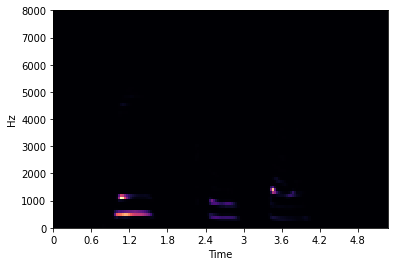

In [76]:
import importlib
import data.VCTK
importlib.reload(data.VCTK) # prevent cache when making changes
from data.VCTK import VCTKDataset

dataset = VCTKDataset(vctk_dataset_path)

# import matplotlib.pyplot as plt
# plt.plot()
import librosa, librosa.display
import numpy as np

S = dataset[0][1]
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');